# Ayudantía Métricas de Desempeño - Python

## Natalie Julian

La base de datos corazón contiene datos de un estudio realizado a residentes de la ciudad de Framingham en Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene un riesgo padecer una enfermedad coronaria futura.

Los atributos registrados en cada residente se describen a continuación:

- male: indica si el sexo es masculino o no
- age: edad del paciente (en años)
- currentSmoker: si el paciente fuma o no
- cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día
- BPMeds: si el paciente estaba o no tomando medicación para la presión arterial
- prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no 
- prevalentHyp: si el paciente era hipertenso o no
- diabetes: si el paciente tenía diabetes o no
- totChol: nivel de colesterol total 
- sysBP: presión arterial sistólica
- diaBP: presión arterial diastólica
- BMI: índice de masa corporal
- heartRate: frecuencia cardíaca
- glucose: nivel de glucosa
- TenYearCHD: Padeció de enfermedad coronaria dentro de los próximos 10 años del estudio (0 No, 1 sí)

### a) Cargue la base de datos. Determine qué variables son numéricas (continuas o discretas) y cuáles son categóricas. ¿Hay alguna variable que necesite tratamiento? Realice el cambio que estime pertinente. ¿De qué naturaleza es la variable respuesta? ¿Nos encontramos en un problema de clasificación o de regresión? Discuta.


In [519]:
import pandas as pd

df = pd.read_csv('corazon.csv', delimiter=";")

df.head(200)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,49,1,9.0,0.0,0,0,0,226.0,106.0,71.0,22.89,85.0,57.0,0
196,1,48,1,10.0,0.0,0,0,0,308.0,117.0,76.0,30.85,65.0,54.0,1
197,0,55,1,9.0,0.0,0,0,0,248.0,157.0,82.5,22.91,89.0,83.0,0
198,0,58,1,5.0,0.0,0,0,0,215.0,170.0,86.0,29.06,75.0,98.0,0


In [520]:
df.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


La naturaleza de las variables se describe a continuación:

- male: indica si el sexo es masculino o no (categórica binaria)
- age: edad del paciente (en años) (numérica, continua por definición aunque está discretizada en la base de datos)
- currentSmoker: si el paciente fuma o no (categórica binaria)
- cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (numérica discretas)
- BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (categórica binaria)
- prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (categórica binaria)
- prevalentHyp: si el paciente era hipertenso o no (categórica binaria)
- diabetes: si el paciente tenía diabetes o no (categórica binaria)
- totChol: nivel de colesterol total (numérica, continua por definición aunque está discretizada en la base de datos)
- sysBP: presión arterial sistólica (numérica continua)
- diaBP: presión arterial diastólica (numérica continua)
- BMI: índice de masa corporal (numérica continua)
- heartRate: frecuencia cardíaca (numérica discreta)
- glucose: nivel de glucosa (numérica, continua por definición aunque está discretizada en la base de datos)
- TenYearCHD: Padeció de enfermedad coronaria dentro de los próximos 10 años del estudio (0 No, 1 sí) (categórica binaria)


Notar que todas las variables categóricas son binarias y además, están codificadas como 1 y 0, por lo tanto no es necesario recodificarlas como dummies.

### b) Determine si existen o no datos faltantes, visualice la proporción de datos faltantes en la base de datos. ¿En qué variable hay mayor cantidad de datos faltantes? ¿Qué haría en este caso con los casos con datos faltantes? Discuta.

In [554]:
df.shape #dimensiones de la bbdd

(3749, 15)

In [555]:
df.info() #claramente hay datos faltantes en algunas variables, cigsPerDay, BPMeds, totChol, sysBP, BMI, heartRate, glucose

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [523]:
#para instalar missingno
#conda install -c conda-forge/label/gcc7 missingno

<AxesSubplot:>

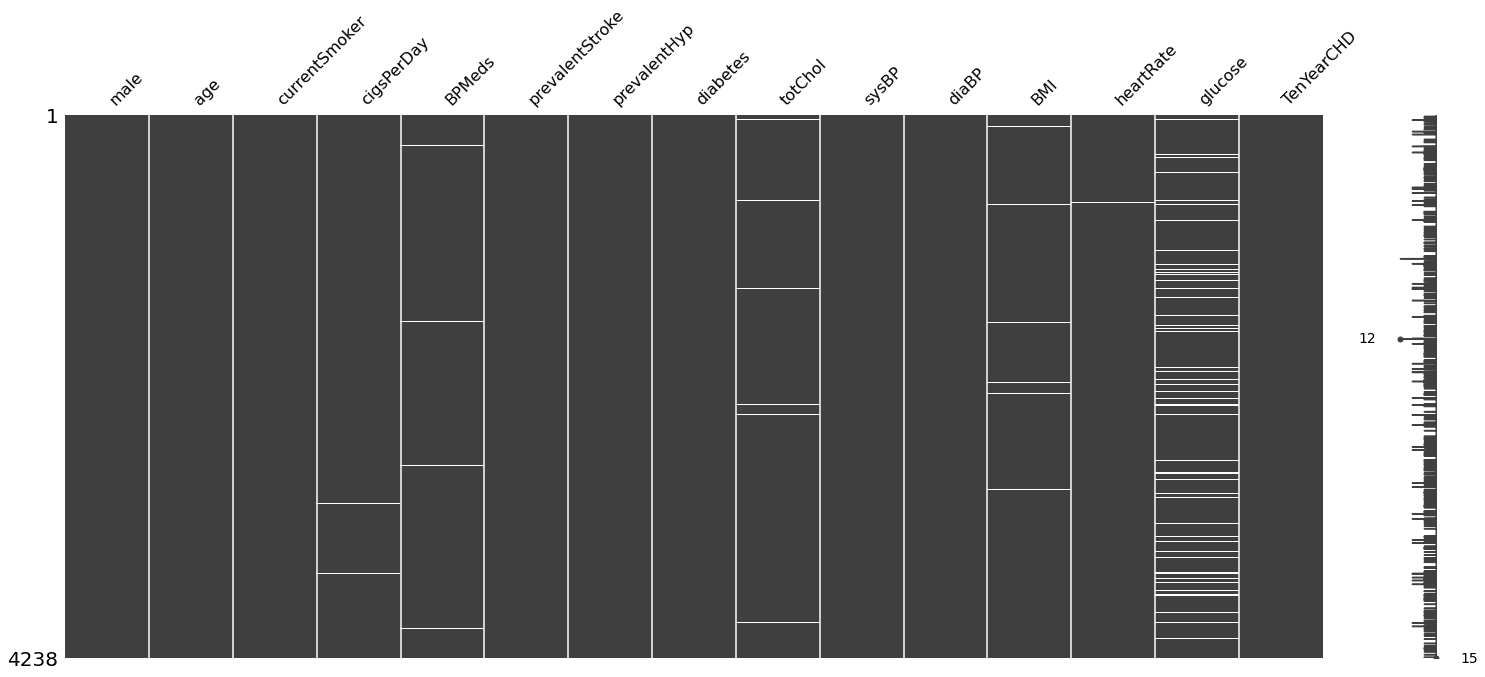

In [524]:
import missingno as msngo
msngo.matrix(df)

Vemos que en la variable glucose es donde predominan los datos faltantes. Una opción: Eliminar la columna glucosa y luego eliminar los registros con algún atributo faltante. Sin embargo, la información de glucosa la perderíamos. Otra opción: imputar los casos faltantes, pero esto no es tan trivial y se requiere conocimiento de técnicas de imputación. La opción que tomaremos: eliminar los registros con algún caso faltante.

In [525]:
df = df.dropna()

In [526]:
df.shape

(3749, 15)

### c) Defina la matriz de variables predictoras X e Y vector de la variable respuesta de manera apropiada, además estandarice X. Obtenga un set de datos de entrenamiento y prueba en proporción 1:4. Utilice una semilla 2020 para este procedimiento. ¿Cómo se distribuyen los residentes con enfermedad de corazón en los distintos set? ¿Qué caso debería ser más fácil de predecir para el modelo en base a los datos? Comente.

In [527]:
X=df.drop('TenYearCHD', axis=1) 

In [528]:
df.drop('TenYearCHD', axis=1) .columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [529]:
from sklearn.preprocessing import StandardScaler #estandariza

sc = StandardScaler()
X_stand = sc.fit_transform(X[['cigsPerDay', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]) #cuando se estandariza se pierde toda la información de nombre de columnas y otros

X_stand = pd.DataFrame(X_stand, columns = X[['cigsPerDay', 'age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].columns)

print(X_stand)

      cigsPerDay       age   totChol     sysBP     diaBP       BMI  heartRate  \
0      -0.755427 -1.234664 -0.940551 -1.195789 -1.083977  0.285424   0.359319   
1      -0.755427 -0.417687  0.292509 -0.515486 -0.162065  0.718351   1.613902   
2       0.922305 -0.184266  0.180413 -0.220689 -0.245875 -0.115525  -0.058875   
3       1.761172  1.332976 -0.267973  0.799765  1.011277  0.681454  -0.895264   
4       1.173965 -0.417687  1.077184 -0.107305  0.089365 -0.666523   0.777513   
...          ...       ...       ...       ...       ...       ...        ...   
3744   -0.755427  0.982843 -1.119905  0.391584 -0.162065 -0.208998   0.359319   
3745   -0.755427  2.149953 -1.366518  1.616129  1.178897 -0.656684  -1.313458   
3746   -0.671541  0.049156  1.704924  2.115017  0.759847  0.039443  -0.811625   
3747    2.851698  0.165867 -0.671520 -0.266042 -0.245875 -1.500399  -0.895264   
3748   -0.755427  0.282578  0.718475  0.051433  0.005555 -1.067472   0.359319   

       glucose  
0    -0.20

In [530]:
X_cat=X[['male', 'currentSmoker', 'BPMeds','diabetes', 'prevalentStroke', 'prevalentHyp']]

X_cat.reset_index(drop=True, inplace=True)

print(X_cat)

      male  currentSmoker  BPMeds  diabetes  prevalentStroke  prevalentHyp
0        1              0     0.0         0                0             0
1        0              0     0.0         0                0             0
2        1              1     0.0         0                0             0
3        0              1     0.0         0                0             1
4        0              1     0.0         0                0             0
...    ...            ...     ...       ...              ...           ...
3744     1              0     0.0         0                0             1
3745     1              0     0.0         0                0             1
3746     1              1     0.0         0                0             1
3747     1              1     0.0         0                0             0
3748     0              0     0.0         0                0             0

[3749 rows x 6 columns]


In [531]:
X=pd.concat([X_cat,X_stand], axis=1)

print(X)

      male  currentSmoker  BPMeds  diabetes  prevalentStroke  prevalentHyp  \
0        1              0     0.0         0                0             0   
1        0              0     0.0         0                0             0   
2        1              1     0.0         0                0             0   
3        0              1     0.0         0                0             1   
4        0              1     0.0         0                0             0   
...    ...            ...     ...       ...              ...           ...   
3744     1              0     0.0         0                0             1   
3745     1              0     0.0         0                0             1   
3746     1              1     0.0         0                0             1   
3747     1              1     0.0         0                0             0   
3748     0              0     0.0         0                0             0   

      cigsPerDay       age   totChol     sysBP     diaBP       

In [532]:
X.tail()

,male,currentSmoker,BPMeds,diabetes,prevalentStroke,prevalentHyp,cigsPerDay,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
3744,1,0,0.0,0,0,1,-0.755427,0.982843,-1.119905,0.391584,-0.162065,-0.208998,0.359319,-0.036976
3745,1,0,0.0,0,0,1,-0.755427,2.149953,-1.366518,1.616129,1.178897,-0.656684,-1.313458,-0.120711
3746,1,1,0.0,0,0,1,-0.671541,0.049156,1.704924,2.115017,0.759847,0.039443,-0.811625,0.172362
3747,1,1,0.0,0,0,0,2.851698,0.165867,-0.671520,-0.266042,-0.245875,-1.500399,-0.895264,-0.581254
3748,0,0,0.0,0,0,0,-0.755427,0.282578,0.718475,0.051433,0.005555,-1.067472,0.359319,1.051580


In [533]:
y=df['TenYearCHD']

In [534]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020) #set de entrenamiento y prueba

In [535]:
X_train.reset_index(drop=True, inplace=True) #Drop resetea el índice al n° de fila, inplace modifica el objeto
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [536]:
print(pd.crosstab(index=y_train, columns="count") )

col_0       count
TenYearCHD       
0            2550
1             449


In [537]:
print(pd.crosstab(index=y_test, columns="count") )

col_0       count
TenYearCHD       
0             627
1             123


Hay más casos de residentes que no presentaron enfermedad al corazón que los que sí, por ende, al modelo le debería costar más predecir los casos donde sí hubo enfermedad (ya que tiene menos datos con los que entrenar, aunque también va a depender de las variables y de cómo logren separar los distintos casos).

### d) Entrene un modelo de regresión logística, obtenga los parámetros asociados a cada variable, evalúe significancia de cada uno e interprételos. ¿Qué variables son factores de riesgo/factores protectores de padecer una enfermedad al corazón? Comente.


Si queremos obtener resúmenes estadísticos como en R, con LogisticRegression de SKLearn, no es tan sencillo. Probaremos con el paquete statsmodels:

In [538]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [539]:
explicativas = "+".join(df.drop('TenYearCHD', axis=1).columns)  #necesitamos ingresarle la formula
formula = 'TenYearCHD ~ '+explicativas 

print(formula)

TenYearCHD ~ male+age+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose


In [540]:
 #esta librería requiere solo una data, por lo que debemos unir y_train y X_train

data_train=pd.concat([y_train,X_train], axis=1)
data_train.head()


,TenYearCHD,male,currentSmoker,BPMeds,diabetes,prevalentStroke,prevalentHyp,cigsPerDay,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,0,1,0.0,0,0,1,0.083439,0.049156,1.368635,1.071887,0.592226,-0.386104,-0.058875,0.758507
1,0,1,1,0.0,0,0,1,1.761172,-0.417687,-1.859742,0.391584,0.592226,-0.750157,-0.895264,-0.706857
2,0,0,0,0.0,0,0,0,-0.755427,0.982843,-0.066199,0.232847,0.550321,-0.383645,-1.480735,-0.413784
3,1,1,1,0.0,0,0,0,0.922305,0.982843,-0.828455,0.164816,0.424606,0.108318,-0.058875,-0.371916
4,1,0,0,0.0,0,0,1,-0.755427,-0.417687,0.001058,2.886027,3.106531,1.434156,-1.480735,-0.916194


In [541]:
lr_sns = smf.glm(formula, family=sm.families.Binomial(), data=data_train)

In [542]:
result = lr_sns.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2999
Model:                            GLM   Df Residuals:                     2984
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.4
Date:                Sat, 21 Aug 2021   Deviance:                       2232.9
Time:                        10:17:10   Pearson chi2:                 3.00e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3282      0.135    -17.271      0.000      -2.592      -2.064
male                0.5107      0.121      4.231      0.000       0.274       0.747
age                 0.5683      0.063      9.055      0.000       0.445       0.691
currentSmoker       0.0118      0.175      0.067      0.946      -0.331       0.355
cigsPerDay          0.2204      0.083      2.649      0.008       0.057       0.383
BPMeds             -0.0159      0.261     -0.061      0.952      -0.528       0.496
prevalentStroke     0.7163      0.523      1.368      0.171      -0.310       1.742
prevalentHyp        0.2309      0.154      1.504      0.133      -0.070       0.532
diabetes            0.1606      0.351      0.458      0.647      -0.527       0.848
totChol             0.0708      0.056      1.265      0.206      -0.039       0.181
sysBP               0.3127      0.092      3.394      0.001       0.132       0.493
diaBP              -0.0226      0.085     -0.266      0.791      -0.189       0.144
BMI                 0.0424      0.057      0.738      0.460      -0.070       0.155
heartRate          -0.0383      0.056     -0.681      0.496      -0.148       0.072
glucose             0.1818      0.064      2.845      0.004       0.057       0.307
===================================================================================
"""

Las variables significativas en el modelo son:

- Edad
- cigsPerDay
- sysBP
- glucose


Además, podemos reconocer que las variables que se asocian con riesgo de padecer enfermedad al corazón serían todos aquellos que tienen un parámetro $\beta$ asociado mayor a 0, entre estos, ser hombre, fumador, si el paciente tomaba medicación para presión arterial, si el paciente es hipertenso, mayor colesterol, mayor presión arterial diástolica, mayor frecuencia cardíaca, mayor glucosa.

### e) Obtenga la matriz de confusión del modelo utilizando como punto de corte 0.5 y calcule e interprete las siguientes métricas de desempeño: 

### - Sensibilidad
### - Precisión
### - Accuracy
### - Área bajo la curva roc

### En base a lo obtenido, ¿usted cree que el modelo posee un buen desempeño? Comente.

In [543]:
data_test=pd.concat([y_test,X_test], axis=1)

data_test=data_test.dropna()

In [544]:
y_pred = result.predict(X_test)

print(y_pred)

predictions = [ 0 if x < 0.5 else 1 for x in y_pred] #punto de corte 0.5

print(predictions)


0      0.151538
1      0.042145
2      0.083798
3      0.340144
4      0.090175
         ...   
745    0.261263
746    0.128215
747    0.065711
748    0.102271
749    0.139854
Length: 750, dtype: float64
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

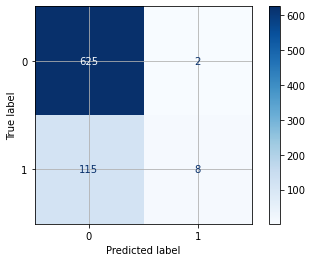

In [545]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues');
plt.grid(None);

In [546]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
m1_acu=accuracy_score(y_test, predictions)
m1_prec = precision_score(y_test, predictions)
m1_rec = recall_score(y_test, predictions)

print( "Accuracy: ", m1_acu, "\nPrecision: ", m1_prec, "\nRecall: ", m1_rec)

Accuracy:  0.844 
Precision:  0.8 
Recall:  0.06504065040650407


Al modelo le cuesta mucho predecir casos positivos, de ahí que el Recall sea tan bajo, predice bien los negativos, pero la clase de mayor interés son los positivos (los que tuvieron enfermedad al corazón), por ende, no sería un modelo con buen desempeño.

In [547]:
y_test.min()

0

In [548]:
y_pred.min()

0.014365215131429498

In [549]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.724939


### f) Determine el mejor punto de corte según algún criterio de interés, evalúe nuevamente las métricas anteriores. ¿Qué pasó respecto al modelo anterior? Comente.

Vamos a probar el threshold que maximiza la tasa de verdaderos positivos * (1-tasa falsos positivos)

In [550]:
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
   t = threshould[np.argmax(tpr*(1-fpr))]
   # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
   print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
   return t


find_best_threshold(thresholds, fpr, tpr)

the maximum value of tpr*(1-fpr) 0.46423153226747577 for threshold 0.166


0.16624561998596765

In [551]:
predictions_2 = [ 0 if x < 0.16 else 1 for x in y_pred]

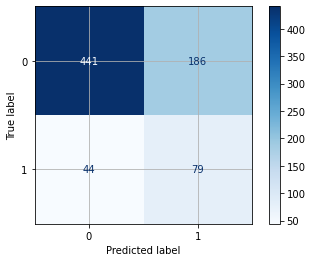

In [552]:
cm_2 = confusion_matrix(y_test, predictions_2)

cm_display = ConfusionMatrixDisplay(cm_2, display_labels=[0, 1])
cm_display.plot(cmap='Blues');
plt.grid(None);

In [553]:
m2_acu=accuracy_score(y_test, predictions_2)
m2_prec = precision_score(y_test, predictions_2)
m2_rec = recall_score(y_test, predictions_2)

print( "Accuracy: ", m2_acu, "\nPrecision: ", m2_prec, "\nRecall: ", m2_rec)

Accuracy:  0.6933333333333334 
Precision:  0.2981132075471698 
Recall:  0.6422764227642277


El modelo mejora en cuanto a predicción de casos positivos, pero empeora en casos negativos, pues ahora el punto de corte es menor, por ende la exigencia para ser clasificado como positivo es menor.